In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
from keras.datasets import mnist
from scipy import ndimage, misc
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train[:500]
y_train = y_train[:500]
x_test = x_test[:100]
y_test = y_test[:100]

In [4]:
mnist_example = x_train[4]
real_example = Image.open('real_data/(13,261).jpg')
real_example = ImageOps.invert(real_example)

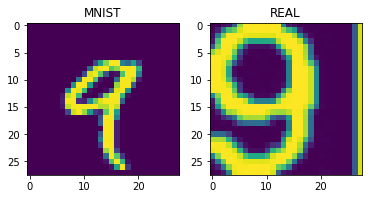

In [5]:
plt.subplot(1,2,1)
plt.title('MNIST')
plt.imshow(mnist_example)

plt.subplot(1,2,2)
plt.title('REAL')
plt.imshow(misc.imresize(real_example, (28,28)))
plt.show()

In [6]:
number_of_classes = 10

In [7]:
normalize = np.vectorize(lambda x: 1 if x > 128 else 0)

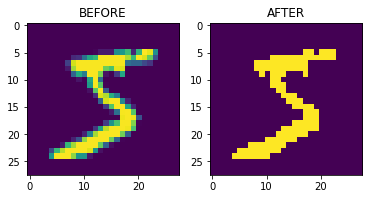

In [8]:
plt.subplot(121)
plt.title('BEFORE')
plt.imshow(x_train[0].reshape((28, 28)))

plt.subplot(122)
plt.title('AFTER')
plt.imshow(normalize(x_train[0]).reshape((28, 28)))

plt.show()

In [9]:
x_train = np.array(list(map(lambda ex: normalize(ex).flatten(), list(x_train))))
x_test = np.array(list(map(lambda ex: normalize(ex).flatten(), list(x_test))))

In [10]:
y_train = keras.utils.to_categorical(y_train, number_of_classes)
y_test = keras.utils.to_categorical(y_test, number_of_classes)

In [11]:
# building the model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes))
model.add(Activation('softmax'))

# compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
batch_size = 16
epochs = 10

In [13]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, 
                       verbose=1)

Train on 450 samples, validate on 50 samples
Epoch 1/10
450/450 [==============================] - 0s - loss: 1.5957 - acc: 0.4956 - val_loss: 0.9932 - val_acc: 0.7200
Epoch 2/10
450/450 [==============================] - 0s - loss: 0.5958 - acc: 0.8511 - val_loss: 0.7833 - val_acc: 0.8000

In [15]:
print('\n\n--------------------------------')
print('Test score:', score[0])
print('Test accuracy:', score[1])



--------------------------------
Test score: 0.462893712521
Test accuracy: 0.83
